In [1]:
import os
os.environ["TF_GPU_ALLOCATOR"]="cuda_malloc_async"

import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [2]:
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from keras.utils import np_utils
from sklearn import metrics 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import random
from numpy import *
from PIL import Image

In [3]:
data_path = "./FruitNetDataset/Dataset/"


In [4]:
CATEGORIES = ["Apple_Good", "Apple_Bad", "Banana_Good", "Banana_Bad","Guava_Good","Guava_Bad"]

In [5]:
training = []

def createTrainingData():
    for category in CATEGORIES:
        path = data_path+category
        print(path)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            new_array=cv2.resize(img_array,(200,200))
            training.append([new_array, class_num])

In [6]:
createTrainingData()

./FruitNetDataset/Dataset/Apple_Good
./FruitNetDataset/Dataset/Apple_Bad
./FruitNetDataset/Dataset/Banana_Good
./FruitNetDataset/Dataset/Banana_Bad
./FruitNetDataset/Dataset/Guava_Good
./FruitNetDataset/Dataset/Guava_Bad


In [7]:
len(training)

6771

In [8]:
random.shuffle(training)

In [9]:
X =[]
y =[]
for features, label in training:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1, 200,200 , 3)

In [10]:
max(y)

5

In [11]:
X = X.astype('float32')
X /= 255
from keras.utils import np_utils
Y = np_utils.to_categorical(y,6)
print(Y[100])
print(shape(Y))

[0. 0. 0. 0. 1. 0.]
(6771, 6)


In [12]:
X

array([[[[0.50980395, 0.5411765 , 0.5372549 ],
         [0.73333335, 0.7647059 , 0.7647059 ],
         [0.8901961 , 0.92941177, 0.92941177],
         ...,
         [0.13333334, 0.16862746, 0.15686275],
         [0.15294118, 0.1882353 , 0.18039216],
         [0.16470589, 0.2       , 0.1882353 ]],

        [[0.49019608, 0.52156866, 0.5176471 ],
         [0.65882355, 0.6901961 , 0.6901961 ],
         [0.827451  , 0.8627451 , 0.8627451 ],
         ...,
         [0.13333334, 0.16862746, 0.15686275],
         [0.12941177, 0.16470589, 0.15294118],
         [0.12156863, 0.15686275, 0.14509805]],

        [[0.4745098 , 0.5058824 , 0.5019608 ],
         [0.5764706 , 0.60784316, 0.60784316],
         [0.74509805, 0.77254903, 0.77254903],
         ...,
         [0.1254902 , 0.16078432, 0.14901961],
         [0.11764706, 0.15294118, 0.14117648],
         [0.11764706, 0.15294118, 0.14117648]],

        ...,

        [[0.10980392, 0.34117648, 0.27058825],
         [0.10980392, 0.34509805, 0.27450982]

In [13]:
print(training[107])

[array([[[159, 122, 118],
        [157, 120, 116],
        [145, 108, 104],
        ...,
        [223, 168, 161],
        [220, 165, 158],
        [222, 167, 160]],

       [[154, 117, 113],
        [151, 114, 110],
        [153, 116, 112],
        ...,
        [226, 171, 164],
        [225, 171, 163],
        [224, 169, 162]],

       [[158, 121, 117],
        [156, 119, 115],
        [161, 124, 120],
        ...,
        [220, 165, 158],
        [223, 168, 161],
        [227, 172, 165]],

       ...,

       [[207, 160, 156],
        [209, 161, 157],
        [202, 154, 150],
        ...,
        [255, 231, 215],
        [255, 230, 214],
        [255, 230, 214]],

       [[212, 164, 160],
        [213, 165, 161],
        [206, 158, 154],
        ...,
        [255, 231, 215],
        [255, 231, 215],
        [255, 229, 213]],

       [[208, 160, 156],
        [210, 162, 158],
        [204, 156, 152],
        ...,
        [252, 227, 211],
        [255, 229, 213],
        [254, 228, 212]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [15]:
y_train=np.array(y_train)
y_test=np.array(y_test)

In [16]:
print(len(X_test),len(y_test))

1355 1355


In [17]:
batch_size = 1
nb_classes =6
nb_epochs = 15
img_rows, img_columns = 200, 200
img_channel = 3
nb_filters = 32
nb_pool = 2
nb_conv = 3

In [18]:
import tensorflow as tf
tf.config.list_physical_devices(
    device_type=None
)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [19]:
from keras import backend as K 
K.clear_session()
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(200, 200, 3)),
        tf.keras.layers.MaxPooling2D((2, 2), strides=2),
        tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu),
        tf.keras.layers.MaxPooling2D((2, 2), strides=2),
        tf.keras.layers.Conv2D(16, (3,3), padding='same', activation=tf.nn.relu),
        tf.keras.layers.MaxPooling2D((2, 2), strides=2),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(6,  activation=tf.nn.softmax)
    ])
model.summary()   


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 16)       0

In [20]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=3),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [21]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, batch_size = batch_size, epochs = nb_epochs, callbacks=my_callbacks,verbose = 1, validation_data = (X_test, y_test))

Epoch 1/15
5416/5416 [==============================] - 40s 7ms/step - loss: 1.2624 - accuracy: 0.5085 - val_loss: 0.4959 - val_accuracy: 0.8244
Epoch 2/15
5416/5416 [==============================] - 33s 6ms/step - loss: 0.4414 - accuracy: 0.8517 - val_loss: 0.3174 - val_accuracy: 0.8834
Epoch 3/15
5416/5416 [==============================] - 33s 6ms/step - loss: 0.2639 - accuracy: 0.9106 - val_loss: 0.2044 - val_accuracy: 0.9225
Epoch 4/15
5416/5416 [==============================] - 34s 6ms/step - loss: 0.1812 - accuracy: 0.9431 - val_loss: 0.1819 - val_accuracy: 0.9469
Epoch 5/15
5416/5416 [==============================] - 34s 6ms/step - loss: 0.1441 - accuracy: 0.9553 - val_loss: 0.2407 - val_accuracy: 0.9314
Epoch 6/15
5416/5416 [==============================] - 36s 7ms/step - loss: 0.1056 - accuracy: 0.9653 - val_loss: 0.2588 - val_accuracy: 0.9299
Epoch 7/15
5416/5416 [==============================] - 39s 7ms/step - loss: 0.0959 - accuracy: 0.9723 - val_loss: 0.1555 - val_ac

In [22]:
def predict(path):

    test_img=cv2.imread(path)
    #print(test_image.shape)
    test_image=cv2.resize(test_img,(200,200))
    #print(test_image.shape)
    test_image = np.array(test_image).reshape(-1, 200,200 , 3)
    test_image = test_image.astype('float32')
    test_image /= 255
    predicted_label=model.predict(test_image)
    pred=list(predicted_label[0])
    max_conf=max(pred)
    pred_label=CATEGORIES[pred.index(max_conf)]
    plt.title(pred_label)
    plt.imshow(test_img)

1/1 [==============================] - 0s 113ms/step


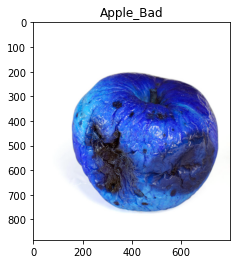

In [23]:
predict("./apple_test.jpg")

##Load a saved weight file and infer 

In [58]:
import keras
from keras.models import load_model
model_infer=load_model('model.04-0.55.h5')
def saved_model_predict(path):

    test_img=cv2.imread(path)
    #print(test_image.shape)
    test_image=cv2.resize(test_img,(200,200))
    #print(test_image.shape)
    test_image = np.array(test_image).reshape(-1, 200,200 , 3)
    test_image = test_image.astype('float32')
    test_image /= 255
    predicted_label=model_infer.predict(test_image)
    pred=list(predicted_label[0])
    max_conf=max(pred)
    pred_label=CATEGORIES[pred.index(max_conf)]
    plt.title(pred_label)
    plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))

1/1 [==============================] - 0s 15ms/step


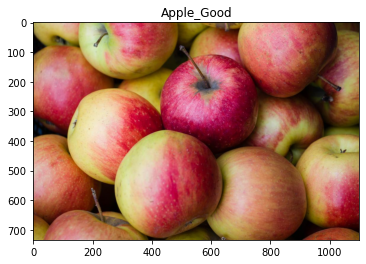

In [67]:
saved_model_predict('./apple_test1.jpg')

43/43 [==============================] - 2s 36ms/step
[[[1132    4]
  [  55  164]]

 [[1123    4]
  [   7  221]]

 [[1113    5]
  [   1  236]]

 [[1127    6]
  [   2  220]]

 [[1079   59]
  [   1  216]]

 [[1121    2]
  [  14  218]]]
**** Confusion Matrix ****
[[164   3   1   1  49   1]
 [  3 221   0   1   3   0]
 [  0   0 236   1   0   0]
 [  1   0   1 220   0   0]
 [  0   0   0   0 216   1]
 [  0   1   3   3   7 218]]
**** Classification Report ****
              precision    recall  f1-score   support

  Apple_Good       0.98      0.75      0.85       219
   Apple_Bad       0.98      0.97      0.98       228
 Banana_Good       0.98      1.00      0.99       237
  Banana_Bad       0.97      0.99      0.98       222
  Guava_Good       0.79      1.00      0.88       217
   Guava_Bad       0.99      0.94      0.96       232

    accuracy                           0.94      1355
   macro avg       0.95      0.94      0.94      1355
weighted avg       0.95      0.94      0.94      1355



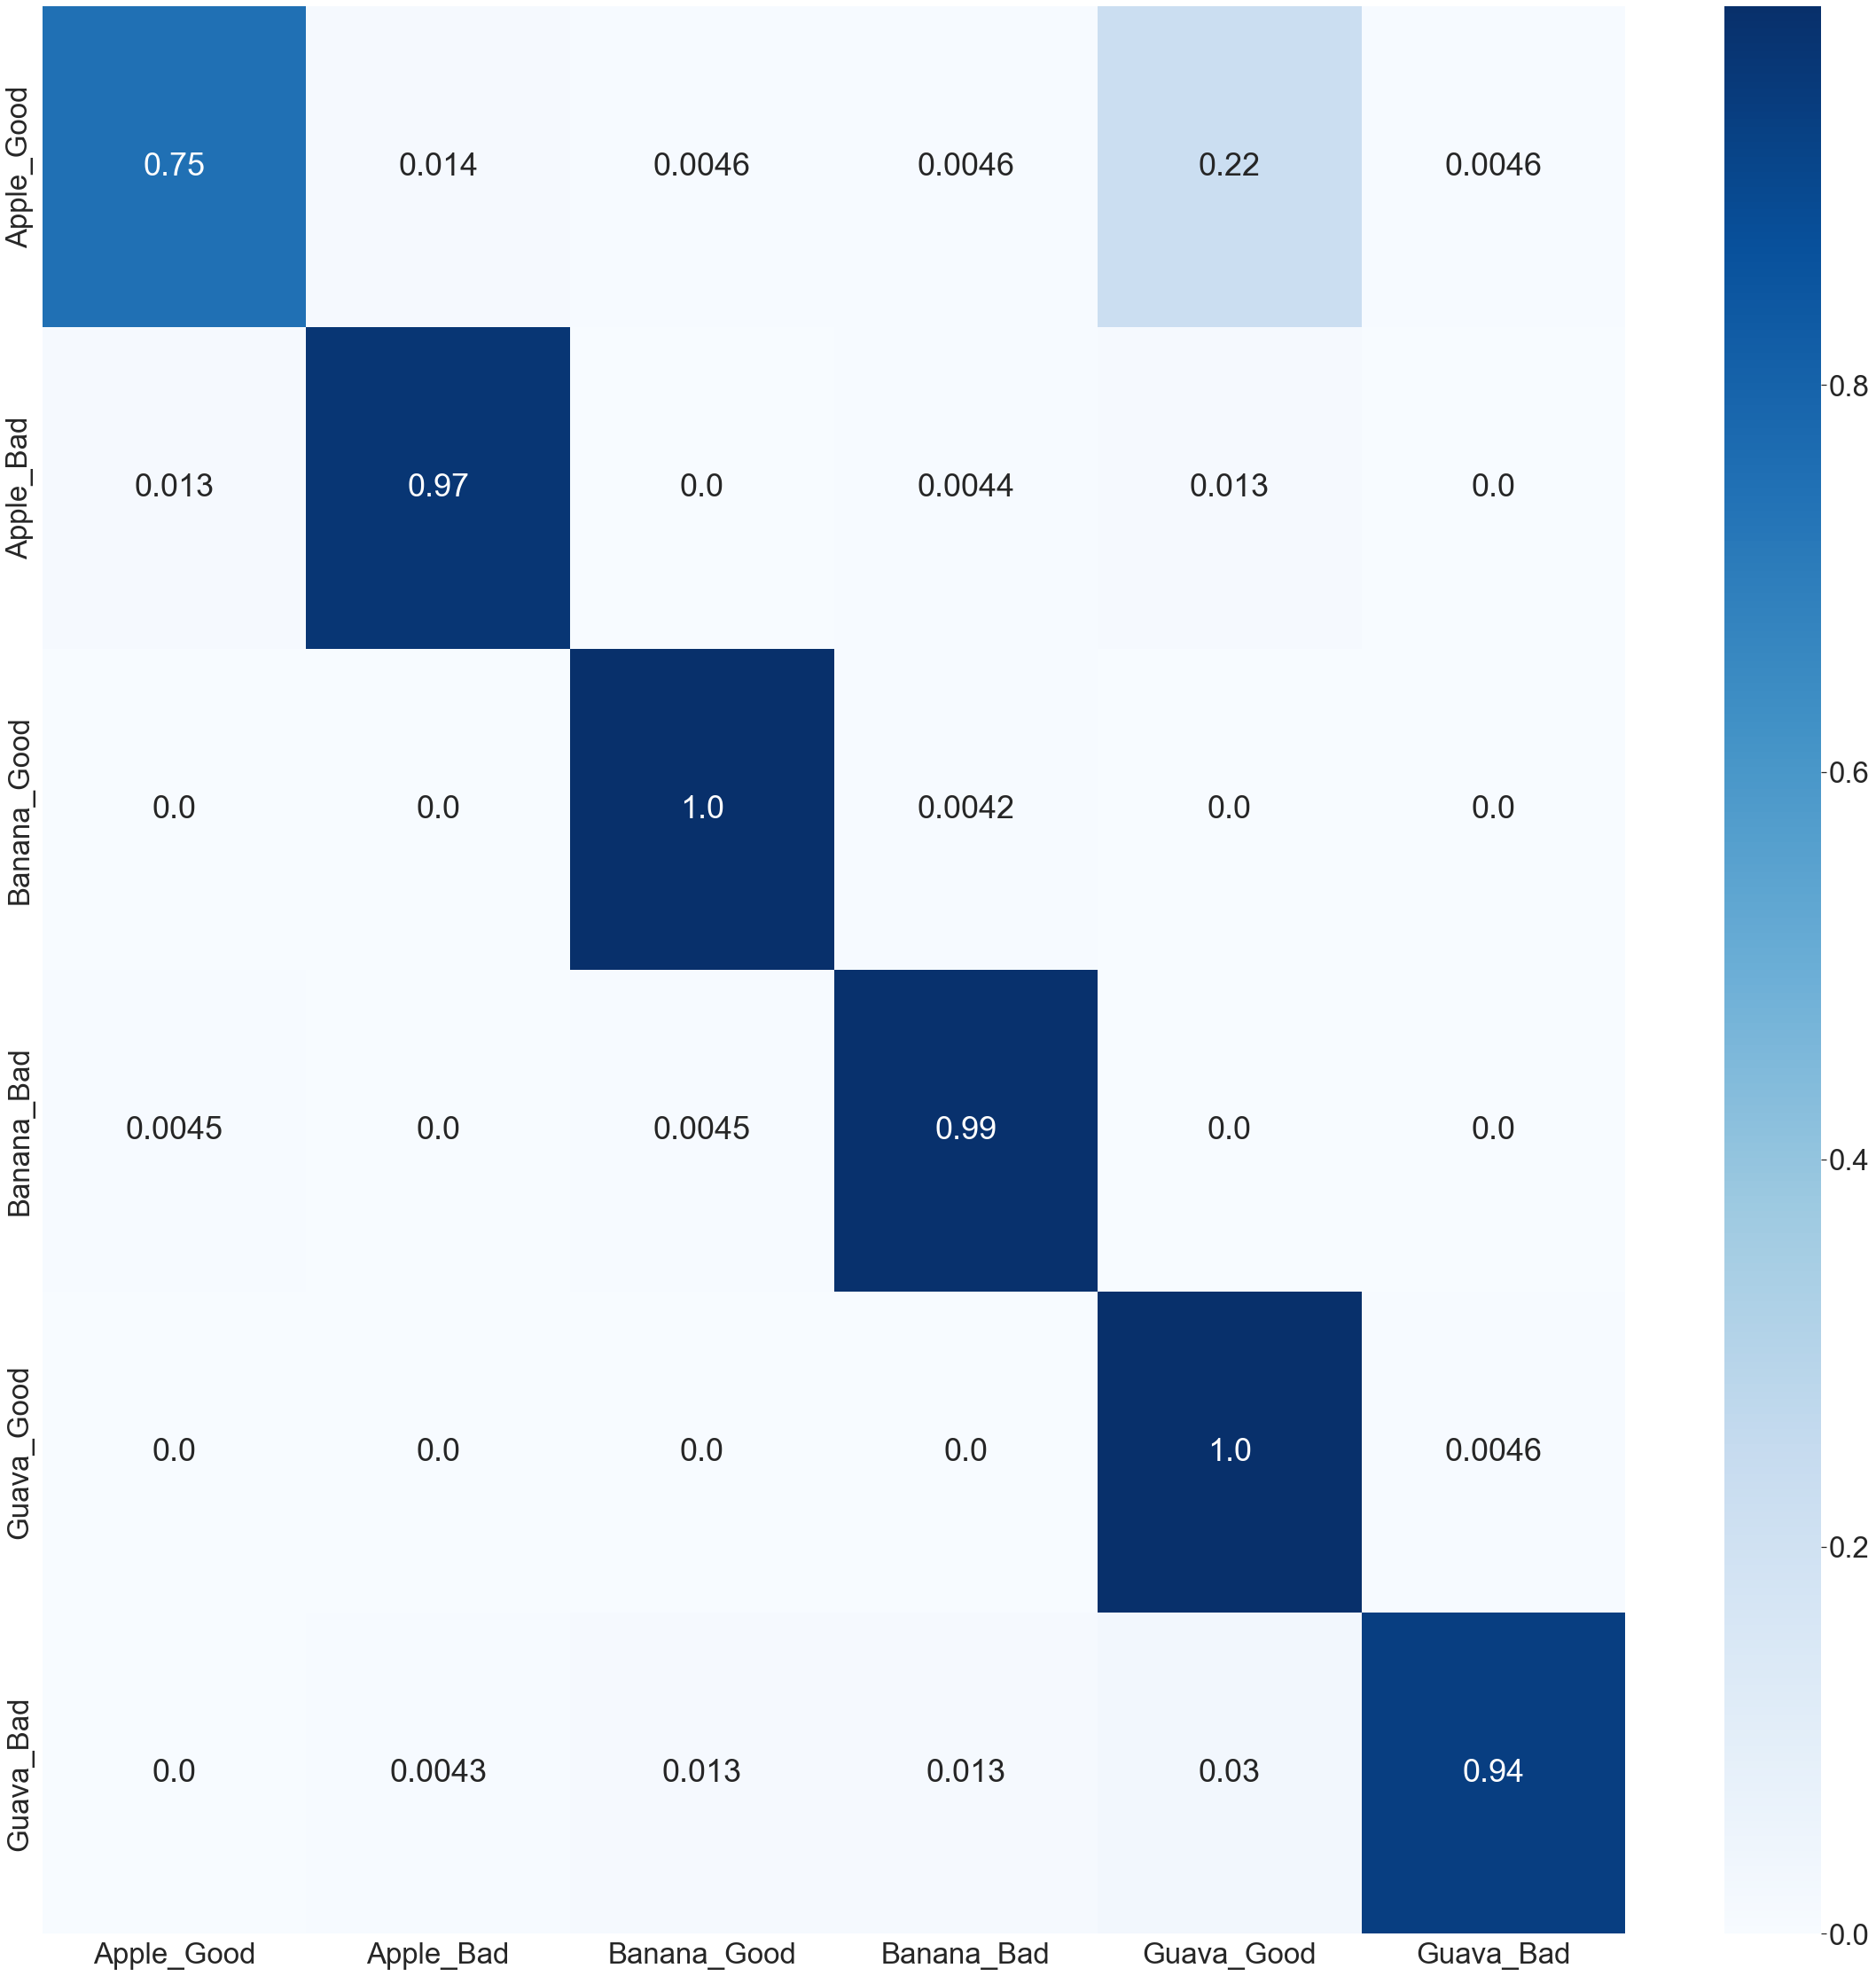

In [80]:
y_pred=model_infer.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
from sklearn.metrics import multilabel_confusion_matrix
mcm = multilabel_confusion_matrix(y_test, y_pred_labels, labels = [0,1,2,3,4,5])
print(mcm)
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_test,y_scores, classNames):
    classes = len(classNames)
    cm = confusion_matrix(y_test, y_scores)
    print("**** Confusion Matrix ****")
    print(cm)
    print("**** Classification Report ****")
    print(classification_report(y_test, y_scores, target_names=classNames))
    con = np.zeros((classes,classes))
    for x in range(classes):
        for y in range(classes):
            con[x,y] = cm[x,y]/np.sum(cm[x,:])

    plt.figure(figsize=(40,40))
    sns.set(font_scale=3.0) # for label size
    df = sns.heatmap(con, annot=True,fmt='.2', cmap='Blues',xticklabels= classNames , yticklabels= classNames)
    df.figure.savefig("image2.png")


plot_confusion_matrix(y_test,y_pred_labels, CATEGORIES) 